In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test103.csv')

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,1,1,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,3,4,Cat_6
2,458996,Female,Yes,69,No,Doctor,0.0,3,1,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,5,2,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,1,4,Cat_6


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
columns = ["Age","Work_Experience","Spending_Score","Family_Size","Gender"]

In [7]:
df.describe()

,ID,Age,Work_Experience,Spending_Score,Family_Size
count,177.000000,177.000000,176.000000,177.000000,177.000000
mean,459610.327684,46.932203,2.448864,2.084746,2.553672
std,464.310455,17.785526,3.160054,1.536911,1.540624
min,458989.000000,18.000000,0.000000,1.000000,1.000000
25%,459150.000000,36.000000,0.000000,1.000000,1.000000
50%,459889.000000,45.000000,1.000000,1.000000,2.000000
75%,460068.000000,59.000000,4.000000,3.000000,3.000000
max,460183.000000,88.000000,13.000000,5.000000,9.000000


In [8]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,1,1,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,3,4,Cat_6
2,458996,Female,Yes,69,No,Doctor,0.0,3,1,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,5,2,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,1,4,Cat_6


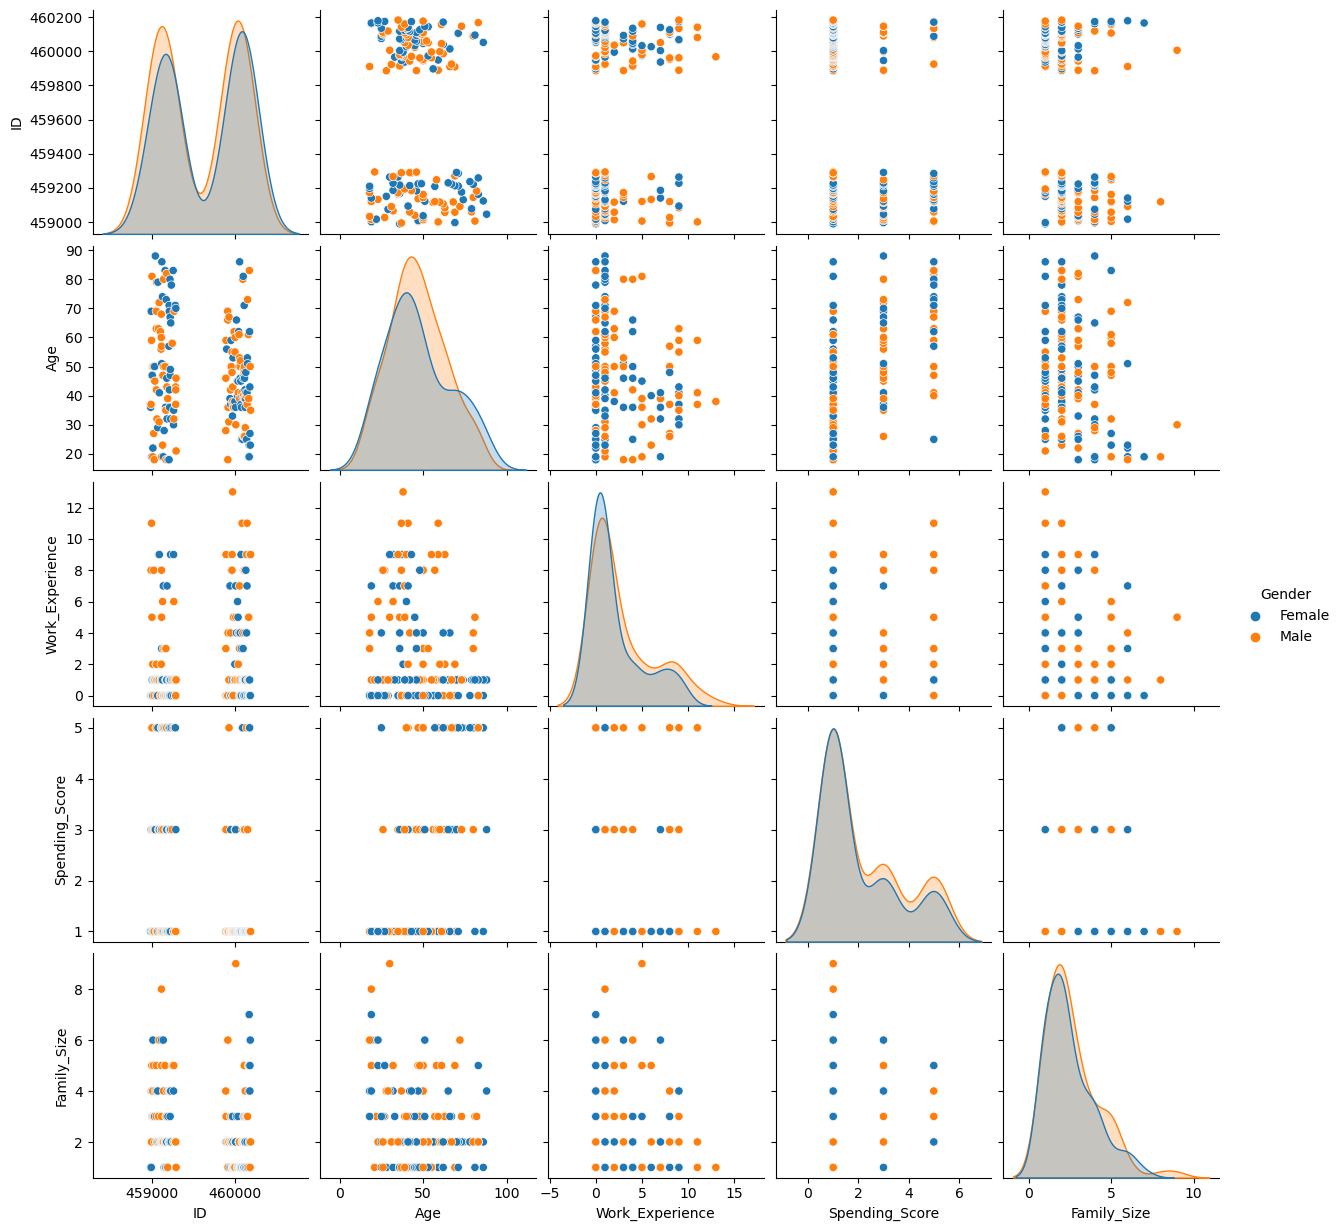

In [9]:
sns.pairplot(df, hue='Gender')

In [10]:
X = df.iloc[:, :1].values
y = df.iloc[:, 4].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
shuffle=True, stratify=y, random_state=42)

In [12]:
lb = LabelEncoder()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
error = []
for i in range(1, 40):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train, y_train)
     pred_i = knn.predict(X_test)
     error.append(np.mean(pred_i != y_test))

C:\Users\62813\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\62813\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [15]:
plt.figure()

<Figure size 640x480 with 0 Axes>

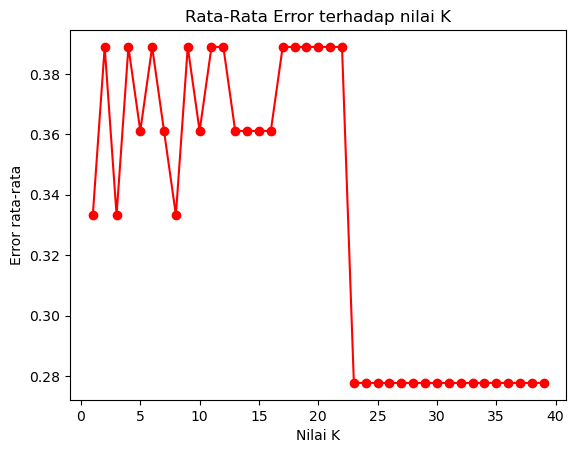

In [16]:
plt.plot(range(1, 40), error, color='red', marker='o')
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')
plt.show()

In [16]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [17]:
y_pred = classifier.predict(X_test)
target_names = ['Gender 0', 'Gender  1', 'Gender 2']
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

          No       0.36      0.50      0.42        10
         Yes       0.77      0.65      0.71        26

    accuracy                           0.61        36
   macro avg       0.56      0.58      0.56        36
weighted avg       0.66      0.61      0.63        36



C:\Users\62813\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 640x480 with 0 Axes>

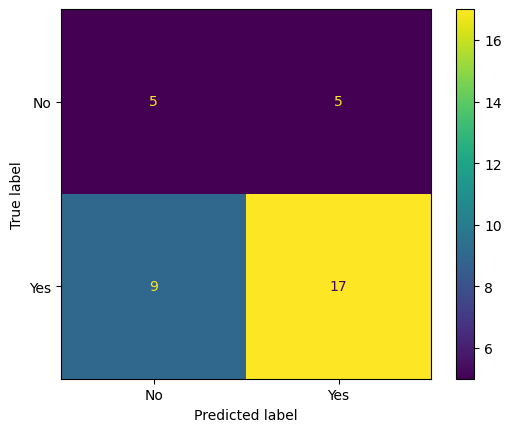

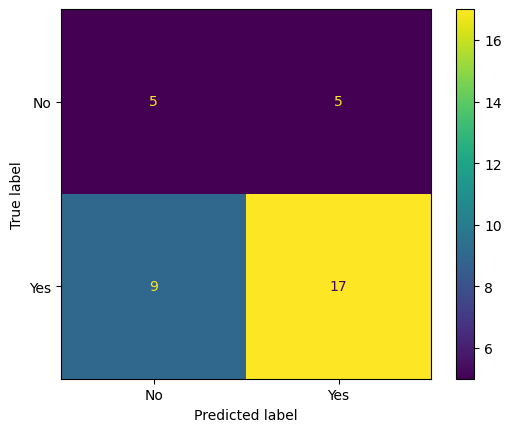

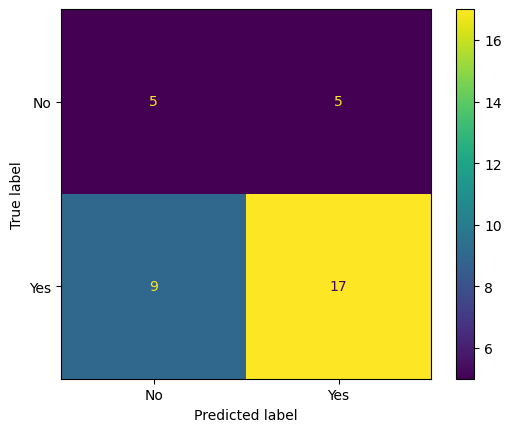

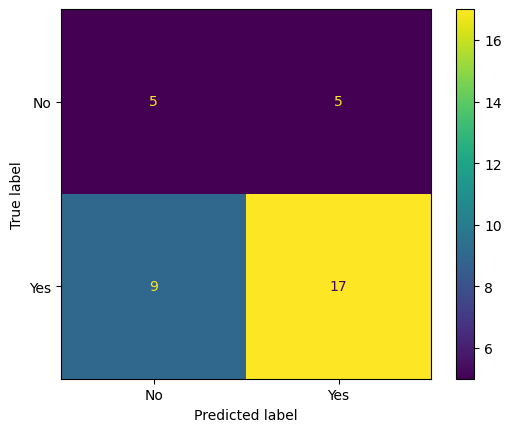

In [21]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()
plt.show()